# Анализ и прогнозирование временного ряда.

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

## Выбор набора данных для решения задачи прогнозирования временного ряда.

**Daily Minimum Temperatures in Melbourne**

Этот набор данных описывает минимальные дневные температуры за 10 лет (1981-1990) в городе Мельбурн, Австралия.

Параметры:
- Date
- Temperatures(Daily minimum temperatures in Melbourne, Australia, 1981-1990)

In [22]:
df = pd.read_csv('daily-minimum-temperatures-in-me.csv', header=0, index_col=0, parse_dates=True)

In [23]:
df.head()

,Temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [24]:
df.shape

(3650, 1)

In [25]:
df.dtypes

Temperatures    float64
dtype: object

## Визуализация временных рядов

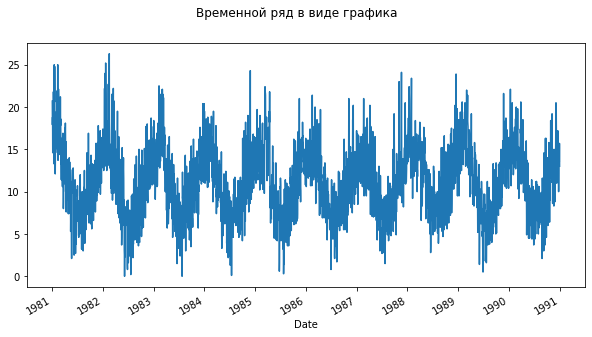

In [26]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
df.plot(ax=ax, legend=False)
pyplot.show()

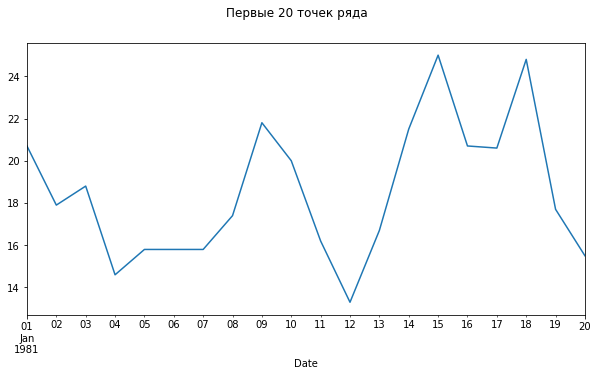

In [27]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Первые 20 точек ряда')
df[:20].plot(ax=ax, legend=False)
pyplot.show()

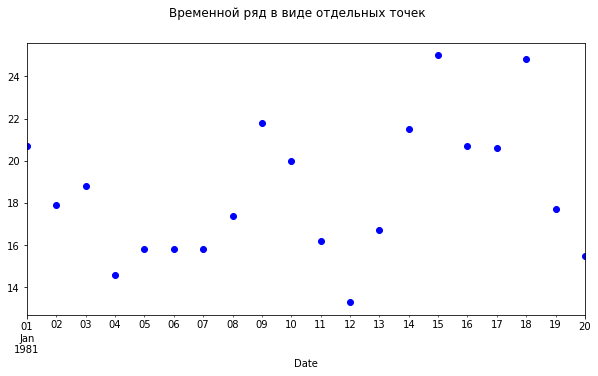

In [28]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде отдельных точек')
df[:20].plot(ax=ax, legend=False, style='bo')
pyplot.show()

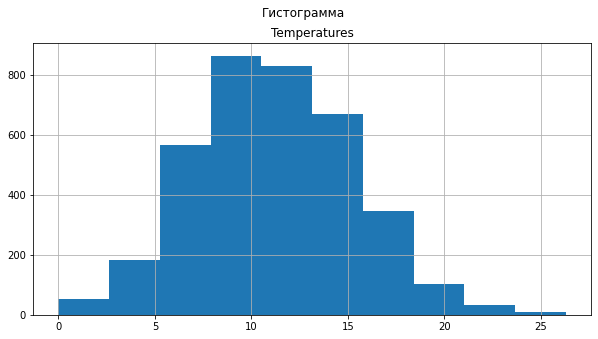

In [29]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
df.hist(ax=ax, legend=False)
pyplot.show()

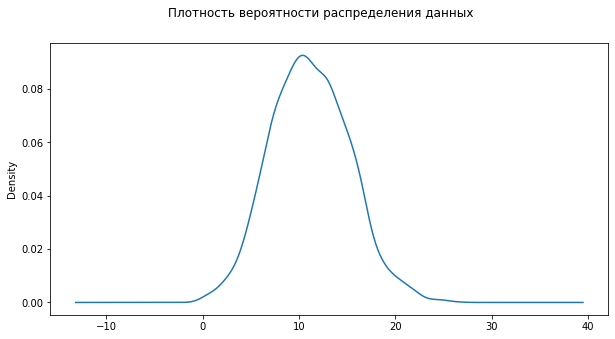

In [30]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
df.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

### Lag Plot и автокорреляционной диаграммы

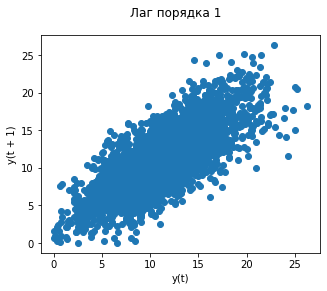

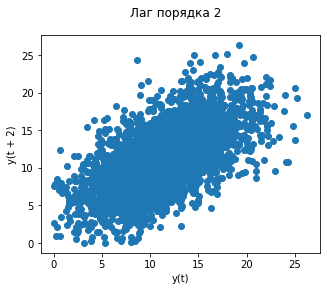

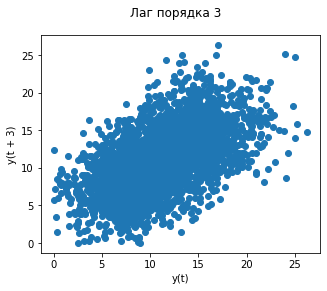

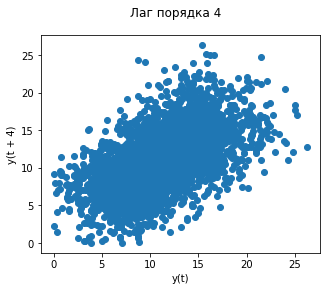

In [31]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(df, lag=i, ax=ax)
    pyplot.show()

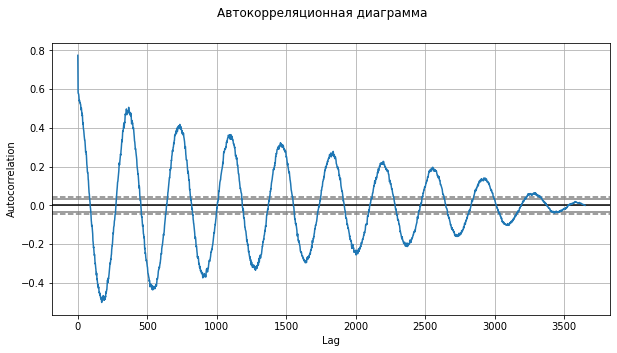

In [32]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(df, ax=ax)
pyplot.show()

## Скользящая средняя

In [35]:
df2 = df.copy()

In [36]:
# Простое скользящее среднее (SMA)
df2['SMA_10'] = df2['Temperatures'].rolling(10, min_periods=1).mean()
df2['SMA_20'] = df2['Temperatures'].rolling(20, min_periods=1).mean()

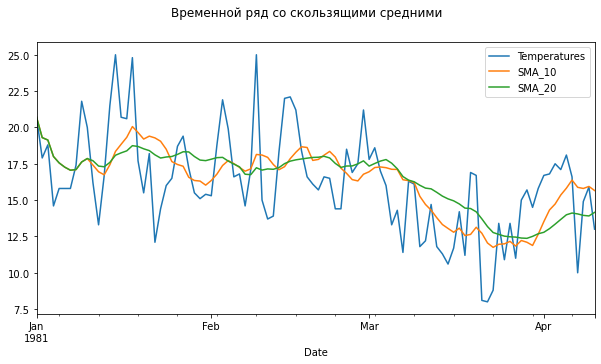

In [37]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд со скользящими средними')
df2[:100].plot(ax=ax, legend=True)
pyplot.show()

## Прогнозирование временного ряда авторегрессионными методами

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [39]:
# Целочисленная метка шкалы времени 
xnum = list(range(df.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = df['Temperatures'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]

In [40]:
# Параметры модели (p,d,q) 
arima_order = (6,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])
# Вычисление метрики RMSE
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [41]:
# Формирование предсказаний
predictions_es = list()
for t in range(len(test)):
    model_es = ExponentialSmoothing(history_es)
    model_es_fit = model_es.fit()
    yhat_es = model_es_fit.forecast()[0]
    predictions_es.append(yhat_es)
    history_es.append(test[t])
# Вычисление метрики RMSE
error_es = mean_squared_error(test, predictions_es, squared=False)

In [42]:
# Ошибка прогноза
np.mean(Y), error_arima, error_es

(11.177753424657535, 2.330201189898355, 2.474322274396435)

In [43]:
# Записываем предсказания в DataFrame
df2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
df2['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

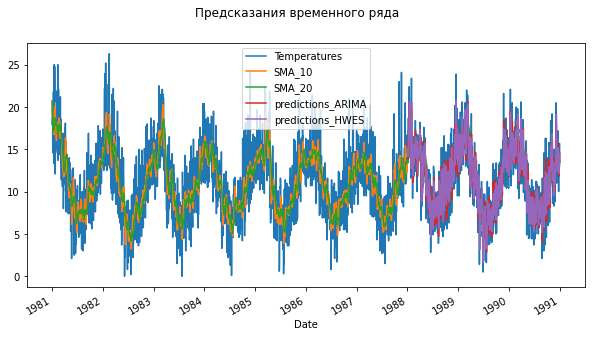

In [44]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
df2.plot(ax=ax, legend=True)
pyplot.show()

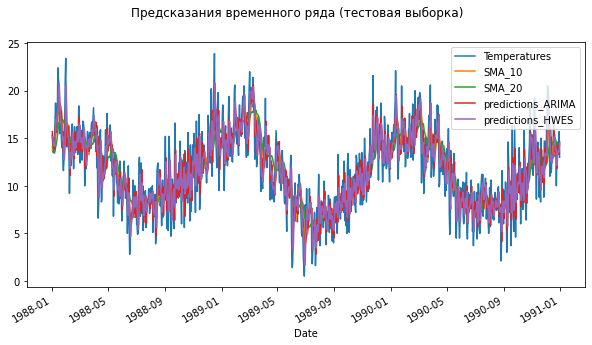

In [45]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
df2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

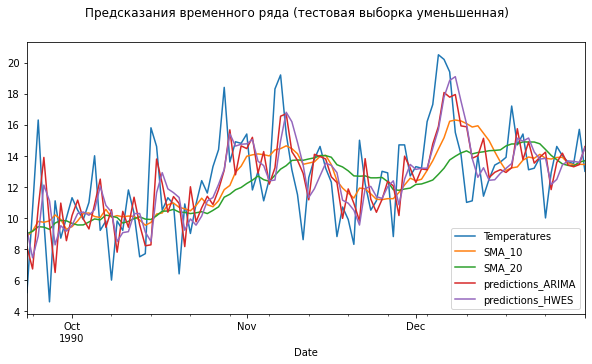

In [46]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка уменьшенная)')
df2[-100:].plot(ax=ax, legend=True)
pyplot.show()

**Вывод. Предсказания ARIMA и HWES близки к истинному значению.**

## Оценка качества
Используем метрики MAE и MSE

Модель ARIMA:

In [53]:
error_arima

2.330201189898355

In [52]:
mean_absolute_error(test, predictions_arima)

1.8340234212209268

Модель Хольта-Винтера:

In [54]:
error_es

2.474322274396435

In [55]:
mean_absolute_error(test, predictions_es)

1.935119211086749

Модель ARIMA показала себя лучше.